In [6]:
import csv
import pandas as pd
from pprint import pprint
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 11,7

def print_tabular_data(file_name,delimiter=","):
    """This function extracts and prints tabular csv content from given filename
       Details: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma ('\t')

    Returns:
        None

    """
    df = pd.read_csv(file_name,sep=delimiter)
    return df

In [22]:
data = print_tabular_data(r'INDUSINDBK-EQ.csv')
data
stock_name = data['INDUSINDBK-EQ C']

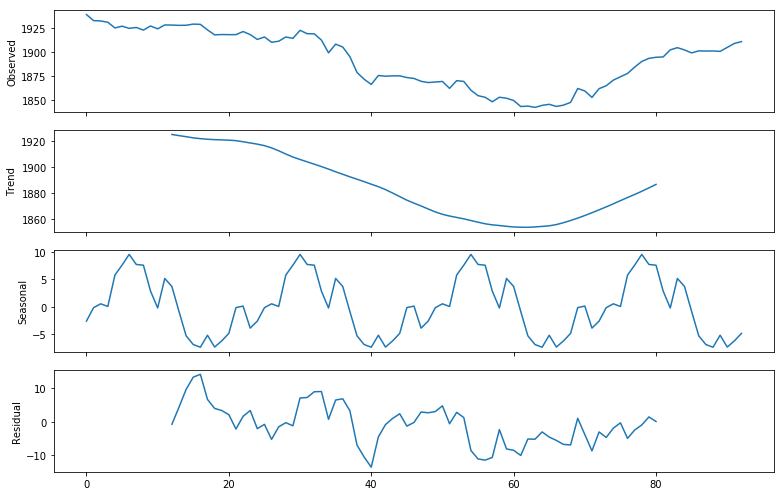

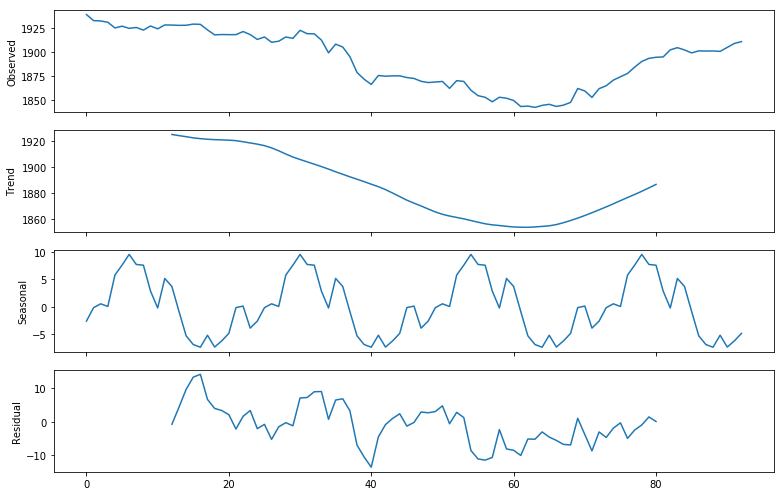

In [23]:
#data.plot(y=input_dat)
ts_close = pd.Series(stock_name)
deompose = seasonal_decompose(ts_close.interpolate(),
                                    freq=24)
deompose.plot()

# Smoothing

In [ ]:
# moving average
data['moving_average'] = stock_name.rolling(window=3,center=False).mean()

print(data[['BPCL-EQ C','moving_average']].head(10))

plt.plot(data['BPCL-EQ C'],'-',color='black',alpha=0.3)
plt.plot(data.moving_average,color='b')
plt.title('Price and Moving Average Smoothening')
plt.legend()
plt.show()

In [ ]:
# exponentially weighted moving average
data['ewma'] = stock_name.ewm(halflife=3,
                                                ignore_na=False,
                                                min_periods=0,
                                                adjust=True).mean()
    
plt.plot(data['BPCL-EQ C'],'-',color='black',alpha=0.3)
plt.plot(data.ewma,color='g')
plt.title('Website Visit and Exponential Smoothening')
plt.legend()
plt.show()
                      